# **BUILDING A MODEL FOR  MOLECULAR SOLUBILITY PREDICTION**

### step1) Load data

In [107]:
import pandas as pd

df= pd.read_csv("delaney_solubility_with_descriptors.csv")
df


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Here in the above data frame
### The columns represent the attributes,where *MolLop* = octanol-water partition coefficient calculatiom,*MolWt* = molecular weight,
### *NumRotatableBonds* = number of rotatable bonds,*AromaticProportion* = ring structure,*logS*=common unit for measuring solubility .

# step2)Cleaning data set
->here no need of cleaing the data set

# *Data preparation*
# step3)Data separation as x and y 

In [108]:
X = df.drop('logS',axis=1)
Y = df.logS


# step4) Data Spliting

In [109]:
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test)=train_test_split(X,Y,test_size=0.2,random_state=100)#random_state=int_value,it gives same data on each run of cell.

# step5)Model Building

### Linear Regression

### Training the Model


In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

# step6) Apply Model Prediction

In [111]:
y_lr_train_pred =lr.predict(x_train)
y_lr_test_pred =lr.predict(x_test)


# step7)Evaluate model performance

In [112]:
from sklearn.metrics import mean_absolute_error,r2_score

lr_train_mae = mean_absolute_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mae=mean_absolute_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)



In [113]:
ls_results = pd.DataFrame(['LinearRegression',lr_train_mae,lr_train_r2,lr_test_mae,lr_test_r2]).transpose()
ls_results.columns=['Method','Training MAE','Taining R2S','Testing MAE','Testing R2S']
ls_results

,Method,Training MAE,Taining R2S,Testing MAE,Testing R2S
0,LinearRegression,0.771699,0.764505,0.77983,0.789162


# RandomForest

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X,Y)

y_rf_train_pred =rf.predict(x_train)
y_rf_test_pred =rf.predict(x_test)

from sklearn.metrics import mean_absolute_error,r2_score

rf_train_mae = mean_absolute_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mae=mean_absolute_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)
rf_results = pd.DataFrame(['RandomForestRegression',rf_train_mae,rf_train_r2,rf_test_mae,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MAE','Taining R2S','Testing MAE','Testing R2S']
rf_results

,Method,Training MAE,Taining R2S,Testing MAE,Testing R2S
0,RandomForestRegression,0.800495,0.763483,0.877012,0.740208


# Model Comparsion

In [115]:
df_models = pd.concat([ls_results,rf_results])
df_models.reset_index(drop=True)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data Visualization of Prediction

<Figure size 640x480 with 0 Axes>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

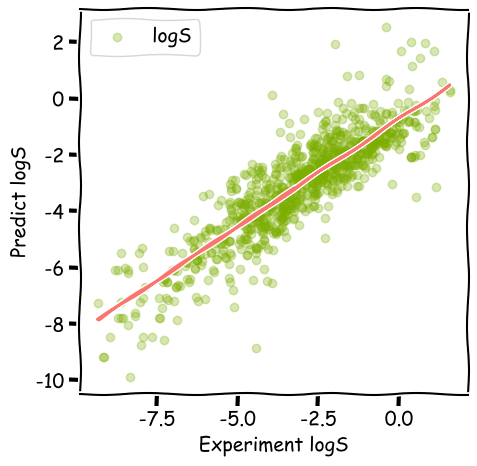

<Figure size 640x480 with 0 Axes>

In [126]:
import matplotlib.pyplot as plt
import numpy as np

plt.xkcd()

x=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(x)

plt.figure(figsize=(5,5))
plt.scatter(y_train,y_lr_train_pred,c="#7CAE00",alpha=0.3,label="logS")
plt.xlabel("Experiment logS")
plt.ylabel("Predict logS")
plt.plot(y_train,p(y_train),'#F8766D')
plt.legend()
plt.figure()

# saving the model 

In [128]:
# saving the model 
import joblib
joblib.dump(lr,"linearregressionmodel.joblib") # its a binary file 
joblib.dump(rf,"randomforestarregressionmodel.joblib") # its a binary file 



['randomforestarregressionmodel.joblib']

# "happy coding"  coding army be kind to everyone ..!